In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers

In [2]:
# Predictive model to categorize 7 different types of Space Shuttles
# Data set provided by UC Irvine
# https://archive.ics.uci.edu/dataset/148/statlog+shuttle
# Statlog (Shuttle). UCI Machine Learning Repository. https://doi.org/10.24432/C5WS31.

# Preprocessing data into pandas dataframe instead of TRN backup

names = ['Index', 'Time', 'Rad Flow', 'Fpv Close', 'Fpv Open', 'High', 'Bypass', 'Bpv Close', 'Bpv Open', 'Class']

train_data = pd.read_csv('shuttle.trn', delimiter=' ', header=None).dropna()
train_data.columns = names
train_data.pop('Index')

encode = pd.get_dummies(train_data['Class'])
train_data.pop('Class')
train_data = pd.concat([train_data, encode.astype(int)], axis='columns')

In [3]:
# Separate train data into features and labels

features = train_data.copy()
# Using one hot encoding to categorize each class
label = pd.concat([features.pop(i) for i in range(1, 8)], axis='columns')

# Normalize features between 0 and 1 to minimize the impact of larger values in model
# Normalization lowered the accuracy of the model (~85%)
# likely due to the larger values being more significant on the model compared to the lower magnitude values

#normalizer = layers.Normalization()
#normalizer.adapt(np.array(features))

#features_norm = normalizer(features)

In [4]:
# Construct basic Sequential model to make predictions

model = tf.keras.Sequential()
model.add(layers.Input(shape=(features.shape[1], )))
#model.add(normalizer)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['accuracy'])

history = model.fit(x=features, y=label, epochs=100, batch_size=10, verbose=0)

In [5]:
# Preparation of test data file to test model

test_data = pd.read_csv('shuttle.tst', delimiter=' ', header=None)
test_data.columns = names
test_data.pop('Index')

encode = pd.get_dummies(test_data['Class'])
test_data.pop('Class')
test_data = pd.concat([test_data, encode.astype(int)], axis='columns')

In [6]:
# One hot encoding and normalization

features_test = test_data.copy()
label_test = pd.concat([features_test.pop(i) for i in range(1, 8)], axis='columns')

#features_test_norm = normalizer(features_test)

454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9783 - loss: 0.0062
Accuracy: 0.9782068729400635	Loss: 0.006352256517857313


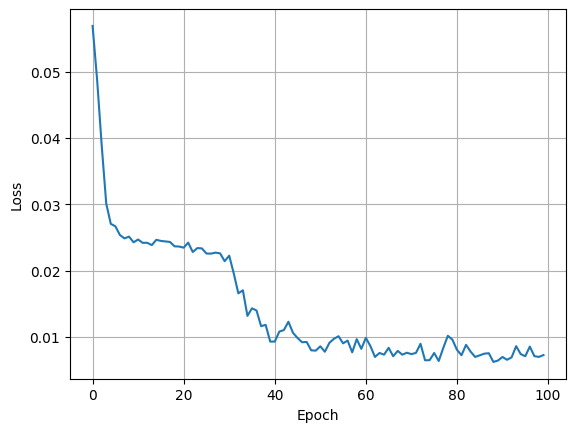

In [8]:
# Evaluate prediction's accuracy and loss

loss, acc = model.evaluate(features_test, label_test)
print(f'Accuracy: {acc}\tLoss: {loss}')

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

hist = pd.DataFrame(history.history)
plot_loss(history)

# This model has fairly high accuracy despite the skew in data. 
# Around 80% of the data was class 1, which shows that the prediction accuracy of ~97% is more than just random chance.
# The data set is large and without missing values, making the process easy and straightforward to predict and model.